## Deutsch-Jozsa and Grover with Aqua


The Aqua library in Qiskit implements some common algorithms so they can be used without needing to program the circuits in each case

In [2]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

# the aqua package
from qiskit.aqua import *
from qiskit.aqua.components.oracles import *
from qiskit.aqua.algorithms import *

To specify the elements in the Deutsch-Jozsa algorithm, we must use an oracle. Aqua offers the possibility of defining this oracle at high level, without giving the actual Quantum Gates, with TruthTableOracle

TruthTableOracle receives a string of zeroes and ones of length $2^n$ that specifies what are the values of the oracle for thr $2^n$ binary strng in lexicographical order. For eg, with the string 0101 we will have a boolean function that it 0 on 00 and 10, but 1 on 01 and 11 (and is balanced)

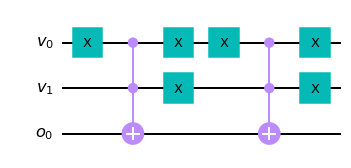

In [12]:
# defining the oracle

oracle = TruthTableOracle("1010")
oracle.construct_circuit().draw(output='mpl')

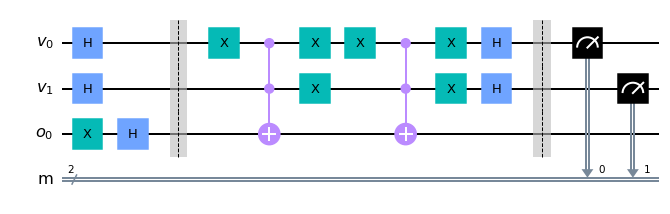

In [13]:
# now the dj algo

dj = DeutschJozsa(oracle)
dj.construct_circuit(measurement=True).draw(output='mpl')

In [14]:
# now lets execute this

backend= Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend)
result = dj.run(quantum_instance)
print(result)

{'measurement': {'01': 1024}, 'result': 'balanced'}


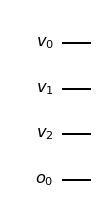

In [19]:
# what about an constant function
oracle_const = TruthTableOracle('00000000')
oracle_const.construct_circuit().draw(output='mpl')



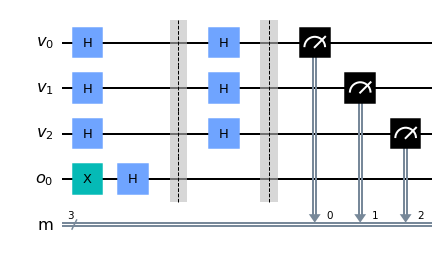

In [20]:
dj_const = DeutschJozsa(oracle_const)
dj_const.construct_circuit(measurement=True).draw(output='mpl')


In [21]:
result = dj_const.run(quantum_instance)
print(result)

{'measurement': {'000': 1024}, 'result': 'constant'}


### Grover's Algorithm
We need to provide an oracle and also specify the number of iterations

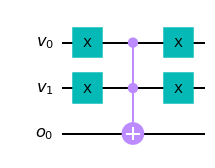

In [43]:
oracle_grover = TruthTableOracle('1000')
oracle_grover.construct_circuit().draw(output='mpl')

In [44]:
g = Grover(oracle_grover, iterations = 1)

# since 1/4 we only need one iteration to find it exactly

#t(measurement=True).draw(output='mpl')

In [45]:
result = g.run(quantum_instance)

In [46]:
print(result)

{'measurement': {'00': 1024}, 'top_measurement': '00', 'circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000027782A08AC0>, 'assignment': [-1, -2], 'oracle_evaluation': True}


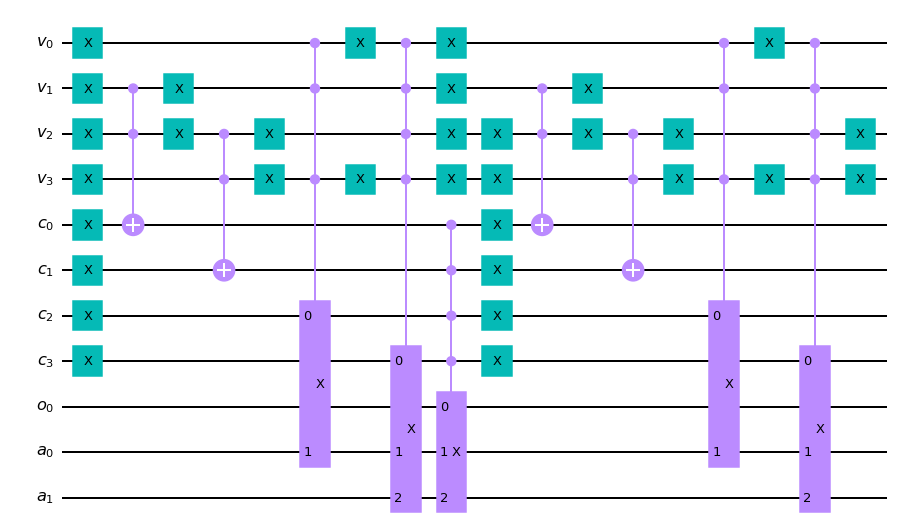

In [48]:
# using the logical expressions

expression = '(x|y) & (~y|z) & (~x|~z|w) & (~x|y|z|~w)'

oracle_logic = LogicalExpressionOracle(expression)
g_logic = Grover(oracle_logic,iterations =3)
oracle_logic.construct_circuit().draw(output='mpl')


#g_logic.construct_circuit(measurement=True).draw(output='mpl')

In [49]:
result = g_logic.run(quantum_instance)
print(result)

{'measurement': {'0010': 154, '1011': 144, '0000': 29, '1001': 26, '0001': 29, '1101': 132, '1111': 156, '0101': 30, '1100': 170, '1010': 36, '0111': 22, '0110': 19, '1000': 21, '0100': 17, '1110': 22, '0011': 17}, 'top_measurement': '1100', 'circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000027782BF2370>, 'assignment': [-1, -2, 3, 4], 'oracle_evaluation': True}


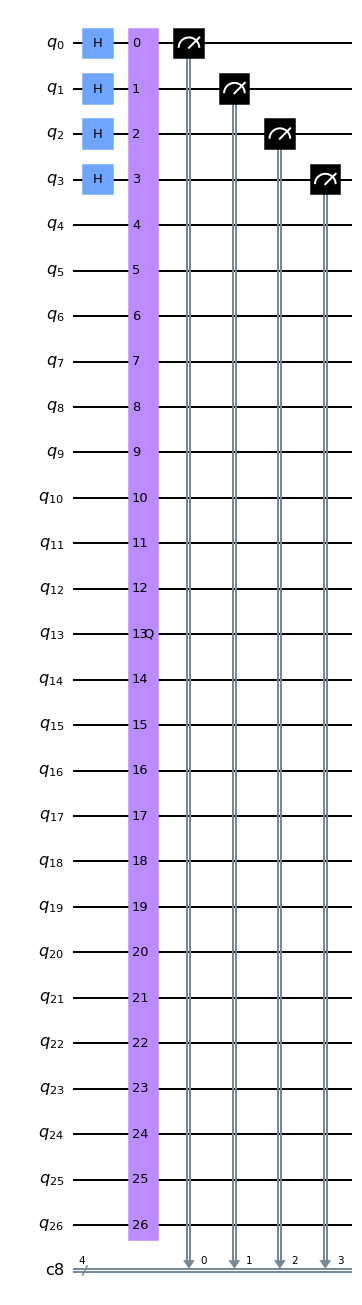

In [53]:
expression2 = '(x & y & z & w) | (~x & ~y & ~z & ~w)'

oracle_2 = LogicalExpressionOracle(expression2,optimization = True)
g2 = Grover(oracle_2, incremental = True)
g2.construct_circuit(measurement=True).draw(output='mpl')


In [52]:
result = g2.run(quantum_instance)
print(result)

{'measurement': {'1000': 13, '0000': 392, '0110': 9, '1111': 413, '0100': 26, '1100': 12, '0101': 18, '0001': 16, '0010': 22, '0011': 7, '1011': 20, '0111': 18, '1101': 15, '1110': 14, '1001': 12, '1010': 17}, 'top_measurement': '1111', 'circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000027785740E20>, 'assignment': [1, 2, 3, 4], 'oracle_evaluation': True}
